# Example of bad fit plot line

In [36]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load data and assign x and y 
X= [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y= [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

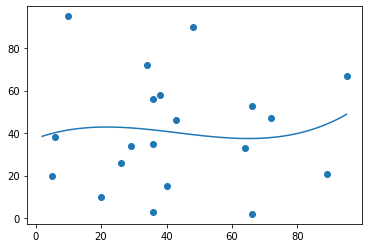

In [7]:
#look into it
mymodel= np.poly1d(np.polyfit(X,y ,3))
myline= np.linspace(2,95,100)
plt.scatter(X,y)
plt.plot(myline,mymodel(myline))
plt.show()

In [42]:
#r squared for bad fit
from sklearn.metrics import r2_score
X= [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y= [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]
model= np.poly1d(np.polyfit(X,y ,3))
print(r2_score(y,model(X)))

0.009952707566680652


# polynomial regression with numpy

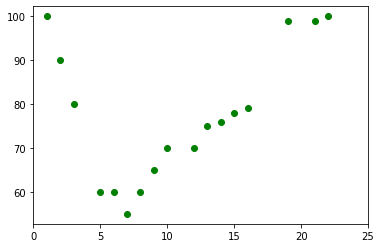

In [44]:
#step 1 look in to data

X = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,178,19,21,22]
y=[100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(X,y,color='green')
plt.xlim(0,25)
plt.show()

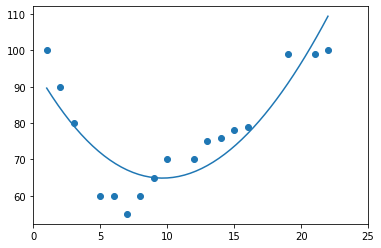

In [47]:
#step 2 draw the line
mymodel= np.poly1d(np.polyfit(X,y ,3))
myline= np.linspace(1,22,50)
plt.scatter(X,y)
plt.plot(myline,mymodel(myline))
plt.xlim(0,25)
plt.show()

In [48]:
#step3 r-squared
model= np.poly1d(np.polyfit(X,y ,3))
print(r2_score(y,model(X)))

0.7855684300264448


In [13]:
#step 4 prediction
speed = mymodel(18)
print(speed)

85.74417683003881


___
___


## another example

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
df = pd.read_csv("salaries.csv")
df["company"]= df["company"].replace({1:'google', 2:'abc pharma', 3:'facebook'})
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [51]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

In [53]:
y

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [55]:

#split data into test and train (80/20)%rule
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=0)

In [57]:
#converting catagories into dummies
from sklearn.preprocessing import LabelEncoder
X['company_n'] = LabelEncoder().fit_transform(X['company'])
X['job_n'] = LabelEncoder().fit_transform(X['job'])
X['degree_n'] = LabelEncoder().fit_transform(X['degree'])

X= X.drop(['company', 'job', 'degree'],axis="columns")
X

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
#creat n fit a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

ValueError: could not convert string to float: 'google'

In [32]:
X.shape

(16, 3)

In [27]:
y.shape

(16,)

TypeError: 'LinearRegression' object is not callable

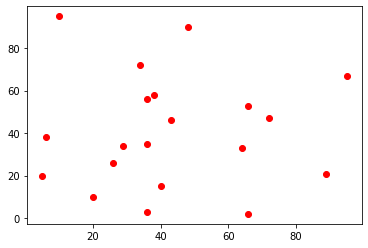

In [40]:
#visualizing the linear regression results

def viz_linear():
    plt.scatter(X,y,color="red")
    plt.plot(X,model(X),color="blue")
    plt.title("truth or bluff(Linear Regression")
    plt.xlabel('company job n position')
    plt.ylabel('salary')
    plt.show()
    return
viz_linear()

In [41]:
#fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(X)
poly_reg= LinearRegression()
poly_reg.fit(X_poly,y)

ValueError: Expected 2D array, got 1D array instead:
array=[89 43 36 36 95 10 66 34 38 20 26 29 48 64  6  5 36 66 72 40].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.